<a href="https://colab.research.google.com/github/Anish-S-tech/my-ml-journey/blob/main/Data_cleaning_in_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data cleaning involves some steps and processes. Here the sample data cleaning process which is done by using titanic dataset

**STEP 1**: Importing libraries and load dataset

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("Titanic-Dataset.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**STEP 2:** Checking for duplicate rows

In [ ]:
df.duplicated().sum()  # No duplicates here

np.int64(0)

**STEP 3:** Identifying column datatypes

In [ ]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
num_col = [col for col in df.columns if df[col].dtype != 'object']

print("Categorical columns: ", cat_col)
print("Numerical columns: ", num_col)

Categorical columns:  ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns:  ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


**STEP 4:** Counting unique values in the categorical columns

In [ ]:
df[cat_col].nunique()

,0
Name,891
Sex,2
Ticket,681
Cabin,147
Embarked,3


**STEP 5:** Calculate missing values as percentage

In [ ]:
round((df.isnull().sum())/df.shape[0]*100 , 2)  # Like, example, "Age" column, (177/891)*100 [null rows/total rows]*100

,0
PassengerId,0.00
Survived,0.00
Pclass,0.00
Name,0.00
Sex,0.00
Age,19.87
SibSp,0.00
Parch,0.00
Ticket,0.00
Fare,0.00


**STEP 6:** Drop irrelevant or data heavy missing columns

In [ ]:
df1 = df.drop(columns=['Name','Ticket','Cabin'])               # Dropping irrelevant columns
df1.dropna(subset=['Embarked'],inplace=True)           # Dropping null values
df1['Age'].fillna(df1['Age'].mean(),inplace=True)      # Filling null values with mean

/tmp/ipython-input-1310298877.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(),inplace=True)      # Filling null values with mean


**STEP 7:** Detect outliers with box plot

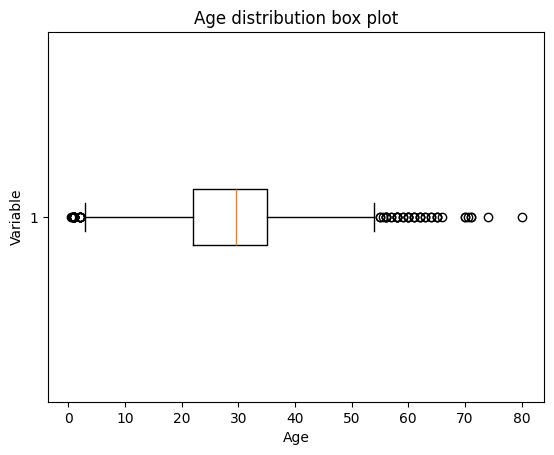

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(df1['Age'],vert=False)
plt.xlabel('Age')
plt.ylabel('Variable')
plt.title("Age distribution box plot")
plt.show()

**STEP 8:** Calculate outlier boundaries and remove them

In [ ]:
mean = df1['Age'].mean()
std = df1['Age'].std()

lower_bound = mean - 2 * std
upper_bound = mean + 2 * std

print("Lower bound:",lower_bound)
print("Upper bound:",upper_bound)

df2 = df1[(df1['Age']>=lower_bound) & (df1['Age']<=upper_bound)]
display(df2)

Lower bound: 3.705400107925648
Upper bound: 55.578785285332785


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.642093,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


**STEP 9:** Check for missing data again if any

In [ ]:
df3 = df2.fillna(df['Age'].mean())
df3.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


**STEP 10:** Recalculate outlier bounds and remove outliers from the updated data

In [ ]:
mean = df3['Age'].mean()
std = df3['Age'].std()

upper_bound = mean + 2 * std
lower_bound = mean - 2 * std

df4 = df3[(df3['Age']>=lower_bound) & (df3['Age']<=upper_bound)]
display(df4)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.642093,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


**STEP 11:** Data validation and verification

In [ ]:
X = df3[['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]  # Separate dataframes for X and Y
Y = df3['Survived']

**STEP 12:** Data formatting (Here using MinMax scaling)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))
num_col_ = [col for col in X.columns if X[col].dtype != 'object']
x1 = X
x1[num_col_] = scaler.fit_transform(x1[num_col_])
x1.head()

/tmp/ipython-input-1993367770.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x1[num_col_] = scaler.fit_transform(x1[num_col_])


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,male,0.349515,0.125,0.0,0.014151,S
1,0.0,female,0.660194,0.125,0.0,0.139136,C
2,1.0,female,0.427184,0.000,0.0,0.015469,S
3,0.0,female,0.601942,0.125,0.0,0.103644,S
4,1.0,male,0.601942,0.000,0.0,0.015713,S
